In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'mulliken_charges.csv', 'dipole_moments.csv', 'train.csv', 'structures.csv', 'magnetic_shielding_tensors.csv', 'potential_energy.csv', 'sample_submission.csv', 'scalar_coupling_contributions.csv', 'structures']


In [2]:
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import numpy.random as rd
import gc
import multiprocessing as mp
import os
import sys
import pickle
from collections import defaultdict
from glob import glob
import math
from datetime import datetime as dt
from pathlib import Path
import scipy.stats as st
import re
import shutil
from tqdm import tqdm_notebook as tqdm
import datetime
ts_conv = np.vectorize(datetime.datetime.fromtimestamp) # 秒ut(10桁) ⇒ 日付

# グラフ描画系
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc

from matplotlib import animation as ani
from IPython.display import Image

plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

#カラム内の文字数。デフォルトは50
pd.set_option("display.max_colwidth", 100)

#行数
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
#
pd.options.display.float_format = '{:,.5f}'.format

%matplotlib inline

In [3]:
train = pd.read_csv('../input/train.csv')
structures = pd.read_csv('../input/structures.csv')


In [4]:

from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [5]:
def calc_radius(data):
    result = ripser(data, coeff=17, do_cocycles=True)
    diagrams = result['dgms']
    dgm1 = diagrams[1]
    if len(dgm1) == 0:
        return np.nan
    else:
        idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
        max_radius =  dgm1[idx, 1] - dgm1[idx, 0]
        return max_radius

In [6]:
radius_list = []
for i, g in tqdm(structures.groupby("molecule_name")):
    r = calc_radius(g[["x", "y", "z"]].values)
    radius_list.append(r)

/opt/conda/lib/python3.6/site-packages/ripser/ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"
/opt/conda/lib/python3.6/site-packages/ripser/ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


In [7]:
tda_radius_df = pd.DataFrame({"molecule_name":structures.molecule_name.unique(), "tda_radius":radius_list})

In [8]:
tda_radius_df.to_csv("tda_radius_df.csv")

In [9]:
tda_radius_df.head(100)

,molecule_name,tda_radius
0,dsgdb9nsd_000001,nan
1,dsgdb9nsd_000002,nan
2,dsgdb9nsd_000003,nan
3,dsgdb9nsd_000004,nan
4,dsgdb9nsd_000005,nan
5,dsgdb9nsd_000007,nan
6,dsgdb9nsd_000008,nan
7,dsgdb9nsd_000009,nan
8,dsgdb9nsd_000010,nan
9,dsgdb9nsd_000011,nan


In [10]:
mol_mean_target = train.groupby("molecule_name")["scalar_coupling_constant"].mean()

In [11]:
mol_mean_target.head()

molecule_name
dsgdb9nsd_000001   27.17045
dsgdb9nsd_000002   10.75507
dsgdb9nsd_000003   -9.94641
dsgdb9nsd_000005   88.20123
dsgdb9nsd_000007   17.68123
Name: scalar_coupling_constant, dtype: float64

In [12]:
tda_radius_df = tda_radius_df.merge(mol_mean_target.reset_index(), on="molecule_name", how="left")

In [13]:
tda_radius_df.head(100)

,molecule_name,tda_radius,scalar_coupling_constant
0,dsgdb9nsd_000001,nan,27.17045
1,dsgdb9nsd_000002,nan,10.75507
2,dsgdb9nsd_000003,nan,-9.94641
3,dsgdb9nsd_000004,nan,nan
4,dsgdb9nsd_000005,nan,88.20123
5,dsgdb9nsd_000007,nan,17.68123
6,dsgdb9nsd_000008,nan,25.29383
7,dsgdb9nsd_000009,nan,29.08059
8,dsgdb9nsd_000010,nan,17.54174
9,dsgdb9nsd_000011,nan,25.04676


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


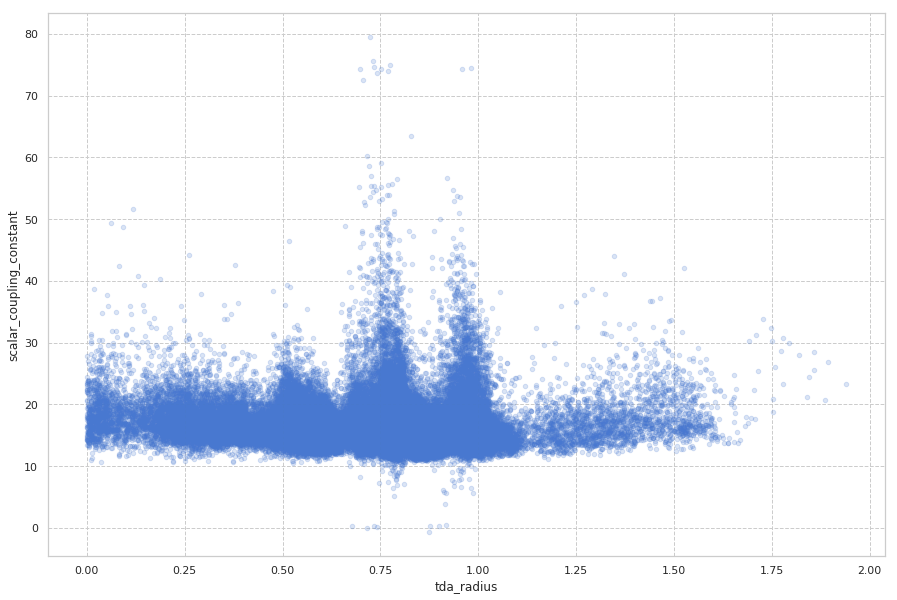

In [14]:
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
tda_radius_df[["tda_radius", "scalar_coupling_constant"]].dropna().plot.scatter(x="tda_radius", y="scalar_coupling_constant", alpha=0.2, ax=ax)

In [15]:
g = structures[structures.molecule_name=="dsgdb9nsd_000050"]
#g = structures[structures.molecule_name=="dsgdb9nsd_000001"]
# g = structures[structures.molecule_name=="dsgdb9nsd_000049"]

In [16]:
g

,molecule_name,atom_index,atom,x,y,z
397,dsgdb9nsd_000050,0,N,-0.00830,1.35363,0.00996
398,dsgdb9nsd_000050,1,C,1.28033,1.82457,-0.00022
399,dsgdb9nsd_000050,2,C,2.12217,0.73699,-0.01446
400,dsgdb9nsd_000050,3,C,1.30850,-0.43110,-0.01284
401,dsgdb9nsd_000050,4,C,-0.00343,-0.01837,0.00236
402,dsgdb9nsd_000050,5,H,-0.83243,1.92773,0.02123
403,dsgdb9nsd_000050,6,H,1.48472,2.88313,0.00354
404,dsgdb9nsd_000050,7,H,3.20067,0.77343,-0.02488
405,dsgdb9nsd_000050,8,H,1.64811,-1.45540,-0.02180
406,dsgdb9nsd_000050,9,H,-0.92552,-0.57697,0.00839


In [17]:
data = g[["x", "y", "z"]].values
result = ripser(data, coeff=17, do_cocycles=True)
print(result)
diagrams = result['dgms']
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
max_radius =  dgm1[idx, 1] - dgm1[idx, 0]

{'dgms': [array([[0.        , 1.00444758],
       [0.        , 1.07810938],
       [0.        , 1.0781095 ],
       [0.        , 1.07916868],
       [0.        , 1.07916903],
       [0.        , 1.37202692],
       [0.        , 1.37202752],
       [0.        , 1.37540054],
       [0.        , 1.37540114],
       [0.        ,        inf]]), array([[1.42354465, 2.21804285]])], 'cocycles': [[], [array([[ 3,  2,  1],
       [ 2,  0, 16]])]], 'num_edges': 45, 'dperm2all': array([[0.        , 1.37202757, 2.21804289, 2.21804237, 1.37202692,
        1.00444763, 2.1374048 , 3.26118183, 3.2611811 , 2.13740644],
       [1.37202757, 0.        , 1.37540118, 2.25588115, 2.24599341,
        2.11539031, 1.07810956, 2.18933859, 3.30059586, 3.26086819],
       [2.21804289, 1.37540118, 0.        , 1.4235446 , 2.25588095,
        3.18571552, 2.23887685, 1.07916867, 2.24306549, 3.31894299],
       [2.21804237, 2.25588115, 1.4235446 , 0.        , 1.37540053,
        3.1857168 , 3.31894408, 2.24306423, 1.079

In [18]:
pd.DataFrame(result["dperm2all"])

,0,1,2,3,4,5,6,7,8,9
0,0.00000,1.37203,2.21804,2.21804,1.37203,1.00445,2.13740,3.26118,3.26118,2.13741
1,1.37203,0.00000,1.37540,2.25588,2.24599,2.11539,1.07811,2.18934,3.30060,3.26087
2,2.21804,1.37540,0.00000,1.42354,2.25588,3.18572,2.23888,1.07917,2.24307,3.31894
3,2.21804,2.25588,1.42354,0.00000,1.37540,3.18572,3.31894,2.24306,1.07917,2.23887
4,1.37203,2.24599,2.25588,1.37540,0.00000,2.11539,3.26087,3.30059,2.18934,1.07811
5,1.00445,2.11539,3.18572,3.18572,2.11539,0.00000,2.50645,4.19529,4.19529,2.50646
6,2.13740,1.07811,2.23888,3.31894,3.26087,2.50645,0.00000,2.71958,4.34167,4.21681
7,3.26118,2.18934,1.07917,2.24306,3.30059,4.19529,2.71958,0.00000,2.71627,4.34167
8,3.26118,3.30060,2.24307,1.07917,2.18934,4.19529,4.34167,2.71627,0.00000,2.71957
9,2.13741,3.26087,3.31894,2.23887,1.07811,2.50646,4.21681,4.34167,2.71957,0.00000


In [19]:
result

{'dgms': [array([[0.        , 1.00444758],
         [0.        , 1.07810938],
         [0.        , 1.0781095 ],
         [0.        , 1.07916868],
         [0.        , 1.07916903],
         [0.        , 1.37202692],
         [0.        , 1.37202752],
         [0.        , 1.37540054],
         [0.        , 1.37540114],
         [0.        ,        inf]]), array([[1.42354465, 2.21804285]])],
 'cocycles': [[], [array([[ 3,  2,  1],
          [ 2,  0, 16]])]],
 'num_edges': 45,
 'dperm2all': array([[0.        , 1.37202757, 2.21804289, 2.21804237, 1.37202692,
         1.00444763, 2.1374048 , 3.26118183, 3.2611811 , 2.13740644],
        [1.37202757, 0.        , 1.37540118, 2.25588115, 2.24599341,
         2.11539031, 1.07810956, 2.18933859, 3.30059586, 3.26086819],
        [2.21804289, 1.37540118, 0.        , 1.4235446 , 2.25588095,
         3.18571552, 2.23887685, 1.07916867, 2.24306549, 3.31894299],
        [2.21804237, 2.25588115, 1.4235446 , 0.        , 1.37540053,
         3.1857168 

In [20]:

data = datasets.make_circles(n_samples=100)[0] + 5 * datasets.make_circles(n_samples=100)[0]


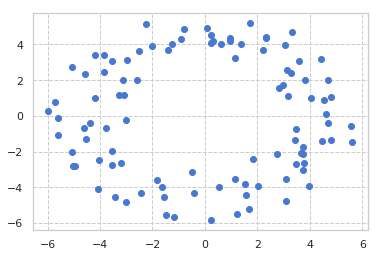

In [21]:
plt.scatter(data[:,0],data[:,1])


In [22]:
calc_radius(data)

4.250452518463135

In [23]:
result = ripser(data, coeff=17, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
#D = result['dm']

In [24]:
0.41 -0.255

0.15499999999999997

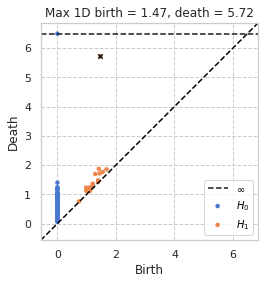

In [25]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


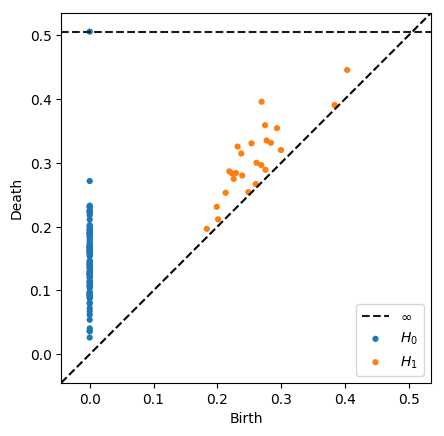

In [26]:
import numpy as np
from ripser import Rips
r = Rips()

data = np.random.random((100,3))
diagram = r.fit_transform(data)
r.plot(diagram, show=True)

In [27]:
diagram

[array([[0.        , 0.02626412],
        [0.        , 0.0360262 ],
        [0.        , 0.03656256],
        [0.        , 0.04058476],
        [0.        , 0.05407964],
        [0.        , 0.06187456],
        [0.        , 0.06714567],
        [0.        , 0.07218006],
        [0.        , 0.07933878],
        [0.        , 0.08086489],
        [0.        , 0.08779483],
        [0.        , 0.08871944],
        [0.        , 0.08946179],
        [0.        , 0.09248323],
        [0.        , 0.09258845],
        [0.        , 0.09291391],
        [0.        , 0.09428112],
        [0.        , 0.09591457],
        [0.        , 0.09599113],
        [0.        , 0.09750941],
        [0.        , 0.10348469],
        [0.        , 0.10568116],
        [0.        , 0.10711569],
        [0.        , 0.1075518 ],
        [0.        , 0.11044237],
        [0.        , 0.11296551],
        [0.        , 0.1135617 ],
        [0.        , 0.11424909],
        [0.        , 0.11963516],
        [0.   